# Lab 4

In [6]:
# sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu fetch califonia

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split




In [4]:
cali = fetch_california_housing()
x = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target)


In [5]:
# chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42) 

#xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(x_train,y_train)
 

LinearRegression()

In [7]:
#dự đoán và đánh giá
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

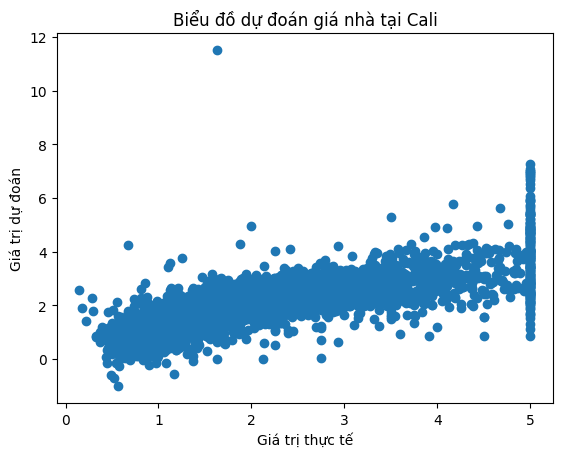

In [8]:
plt.scatter(y_test,y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ dự đoán giá nhà tại Cali')
plt.show() 

Mean Squared Error (MSE): 0.1279
R² Score: 0.0144


ValueError: x and y must be the same size

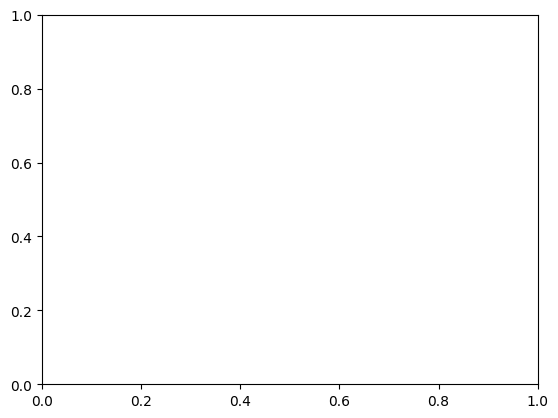

In [8]:
# Hồi quy logistic - Phân loại nhị phân với dữ liệu Breast Cancer


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Đọc dữ liệu từ tệp lab1data1.txt
file_path = "lab1data1.txt"  
df = pd.read_csv(file_path, header=None, names=["X", "y"])

# Chia tập dữ liệu thành train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=40)

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán độ lỗi và đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Hiển thị kết quả
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Vẽ biểu đồ kết quả
plt.scatter(X_test, y_test, color="blue")


plt.xlabel('Giá trị thực tế')
plt.ylabel('Dự đoán')
plt.title("Hồi quy tập dữ liệu")
plt.plot(X_test, y_pred, color="black", linewidth=2)
plt.show()

Độ chính xác: 0.965034965034965
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Ma trận lỗi:
 [[51  3]
 [ 2 87]]


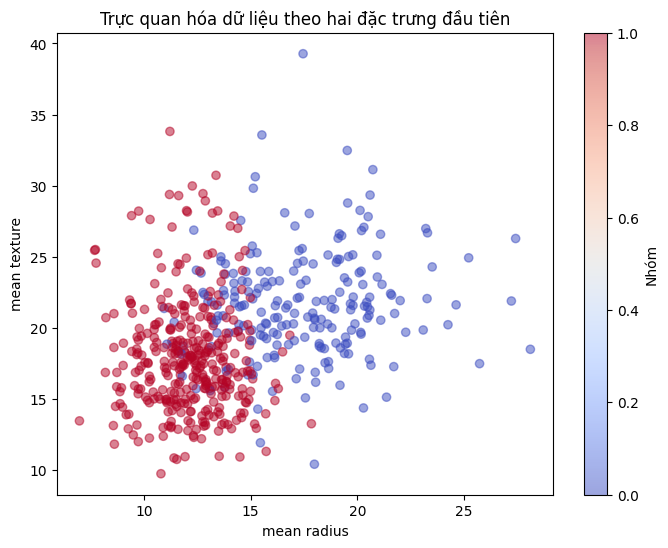

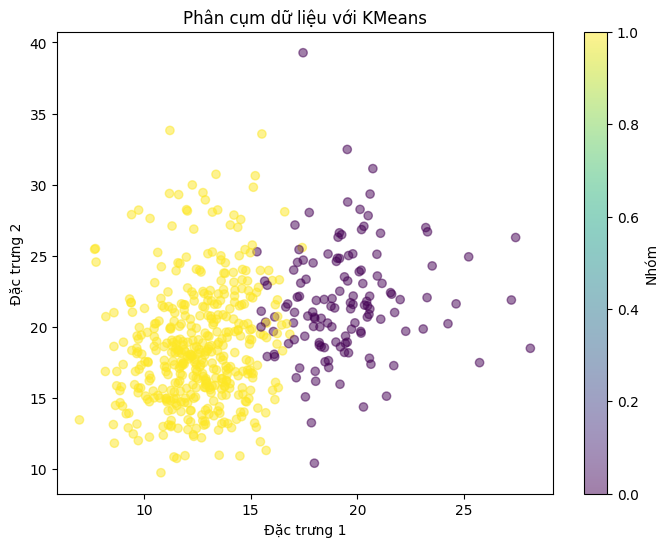

In [3]:
# Hồi quy logistic
# Phân loại nhị phân dựa trên các đặc trưng

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data
y= data.target

#chia cặp dữ liệu thành tập huấn luyến 75% và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#xây dựng và huấn luyện mô hình
model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(X_train, y_train)
#dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Báo cáo phân loại:\n", classification_report(y_test, y_pred))
print("Ma trận lỗi:\n", confusion_matrix(y_test, y_pred))
# trực quan hóa dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Trực quan hóa dữ liệu theo hai đặc trưng đầu tiên')
plt.colorbar(label='Nhóm')
plt.show()
#phân cụm
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.title('Phân cụm dữ liệu với KMeans')
plt.colorbar(label='Nhóm')
plt.show()
# nhóm các đối tượng có đặc điểm tương đồng mà không cần gắn nhãn



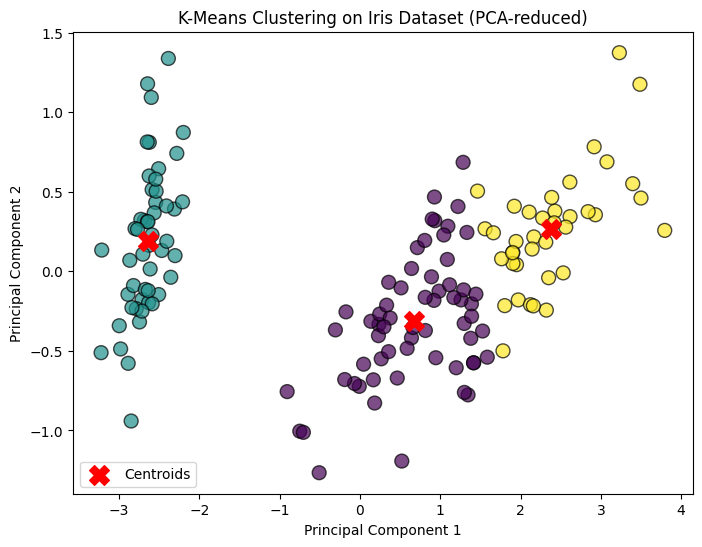

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dữ liệu Iris
iris = datasets.load_iris()
X = iris.data  # có 4 đặc trưng
y = iris.target  # nhãn thực tế

# Áp dụng KMeans với 3 cụm
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.labels_

# Giảm chiều bằng PCA xuống 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Chuyển đổi tọa độ của centroids sang không gian mới
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Trực quan hóa dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', s=100, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Iris Dataset (PCA-reduced)')
plt.legend()
plt.show()


In [ ]:
#BTVN
#1 cho tập dữ liệu dự đoán bệnh tim bằng hồi quy logistic
#2 ứng dụng thuật toán Kmean cho tâpj dữ liệu customer data , you can get in kanggle 
#3 tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn 
#tổng cộng có 2 bài lớn 4 bài nhỏ
#deadline 28/02/2025 

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
file_path = "framingham.csv"
df = pd.read_csv(file_path)

# Drop 'education' since it's categorical with missing values
df.drop(columns=['education'], inplace=True)

# Impute missing values with the median for numerical columns
imputer = SimpleImputer(strategy='median')
df.iloc[:, :] = imputer.fit_transform(df)

# Split features and target variable
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print Results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[710   9]
 [120   9]]
Accuracy: 0.847877358490566
